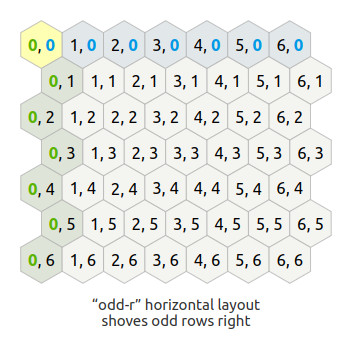

In [1]:
from IPython.display import Image
Image(filename='hex_array.jpg') 
    

In [9]:
tiles={}


def step(x,y,inst):
    while len(inst):
        if inst[:1]=='e':
            inst=inst[1:]
            x+=1
        
        elif inst[:1]=='w':
            inst=inst[1:]
            x-=1
        
        elif inst[:2]=='se':
            inst=inst[2:]
            if y%2==1:
                x+=1
            y+=1
            
        elif inst[:2]=='sw':
            inst=inst[2:]
            if y%2==0:
                x-=1
            y+=1
            
        elif inst[:2]=='nw':
            inst=inst[2:]
            if y%2==0:
                x-=1
            y-=1
            
        elif inst[:2]=='ne':
            inst=inst[2:]
            if y%2==1:
                x+=1
            y-=1
    return x,y
    

for l in [x.strip() for x in open("i24.txt").readlines()]:
    x,y=0,0
    x,y= step(x,y,l)
    s = (x,y)
    if s in tiles:
        del tiles[s]
    else:
        tiles[s]=1
    
print("part1:", len(tiles.keys()), 341)   

neighbours=["e","w","se","sw","nw","ne"]

for i in range(100):    
    newtiles = {}
    candidates=[]
    for x,y in tiles.keys():
        #Any black tile with zero or more than 2 black tiles immediately adjacent to it is flipped to white.
        nc = 0
        for n in neighbours:
            xx,yy=step(x,y,n)
            if (xx,yy) in tiles:
                nc+=1
        if nc in [1,2]:
            #remain black
            newtiles[(x,y)]=1
        
        for n in neighbours:
            xx,yy=step(x,y,n)
            if not (xx,yy) in newtiles:
                candidates.append((xx,yy))

    
    #Any white tile with exactly 2 black tiles immediately adjacent to it is flipped to black.
    for x,y in candidates:
        nc = 0
        for n in neighbours:
            xx,yy=step(x,y,n)
            if (xx,yy) in tiles:
                nc+=1
        if nc == 2:
            newtiles[(x,y)]=1
    tiles=newtiles

print("part2:", len(tiles.keys()), 3700)   


part1: 341 341
part2: 3700 3700
